# Digit Recognizer

Computer vision fundamentals with the famous MNIST data

Importing the datasets

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

Loading dataset

In [14]:
mnist_train=pd.read_csv('/Users/Rashmi/Downloads/test.csv')
mnist_test=pd.read_csv('/Users/Rashmi/Downloads/train.csv')

Visualisation part

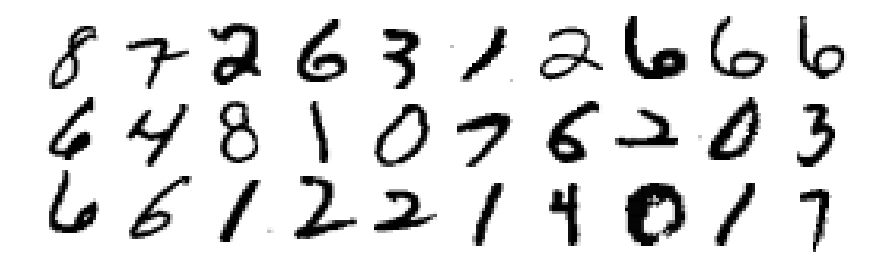

In [ ]:
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_train.shape, mnist_test.shape)

((42000, 785), (28000, 784))


###  check the data 


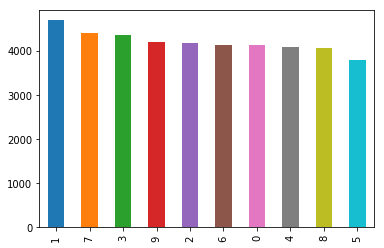

In [ ]:
#%%timeit
#345 ms
ms_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

### PCA  for data visualization


we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [ ]:
#Wall time: 14.6 s
%%time
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

Wall time: 515 ms


In [ ]:
# Wall time: 28.5 s
%%time
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

Wall time: 1.1 s


In [ ]:
# %%timeit -n 3
# 3 loops, best of 3: 1.66 s per loop
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#924770', '#6DCBAC', '#93FDCA', '#34C2DA', '#D035D2', '#D2D6B8', '#A749F9', '#2904CD', '#854A96', '#53E8EB']


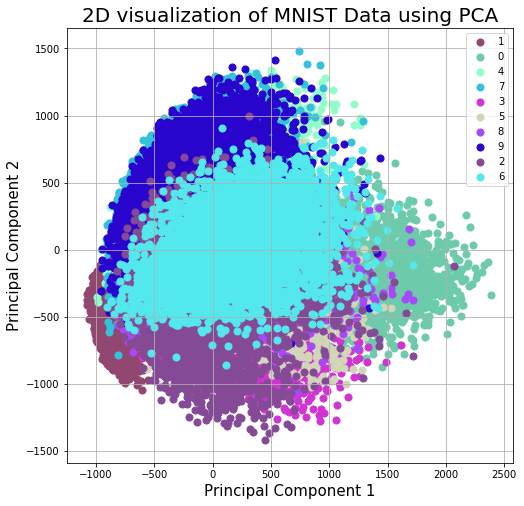

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


#### From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks. 
#### Next technique we try is t-SNE

In [ ]:
%%time
# Wall time: 1h 17min 10s
tsneData = TSNE(random_state=10).fit_transform(X)

Wall time: 1h 17min 10s


In [ ]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-31.7524,38.1141,'0'),
  Text(-2.28285,-48.015,'1'),
  Text(-40.9698,-20.9668,'2'),
  Text(-30.2856,7.64227,'3'),
  Text(52.017,-1.38103,'4'),
  Text(6.68262,21.2271,'5'),
  Text(8.55567,47.4127,'6'),
  Text(14.744,-18.6873,'7'),
  Text(-8.90978,-9.19255,'8'),
  Text(34.0658,-7.63891,'9')])

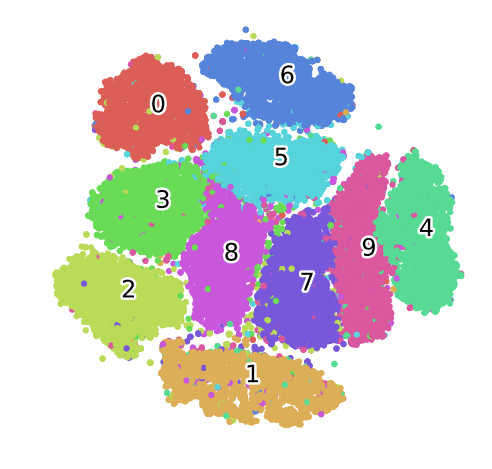

In [ ]:
ScatterPlotTsne(tsneData,y)

#### data is seperable as seperate clusters are formed for each digit

### Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

((25200, 784), (10500, 784), (6300, 784), (25200L,), (10500L,), (6300L,))


## KNN Classifier

In [ ]:
def trainKNN(X_train, y_train, k): 
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [ ]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
%%time
# Wall time: 17min 52s
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|██████████| 9/9 [17:51<00:00, 118.83s/it]


Wall time: 17min 52s


In [ ]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

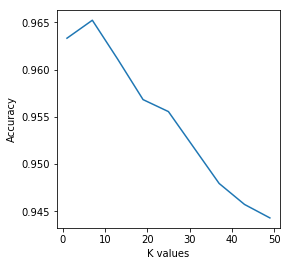

In [ ]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.9406666666666667)
Wall time: 3min 49s


################# Confusion Matrix ####################


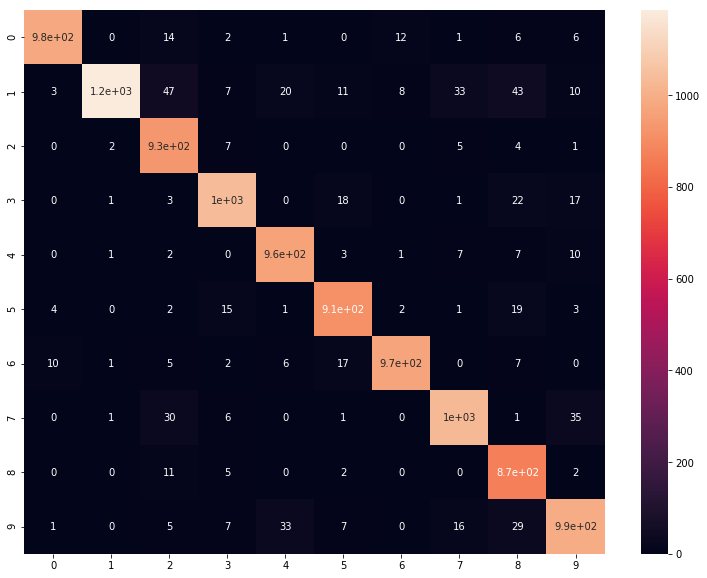

In [ ]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


### GridSearch SVM Classifier 

One/vs/Rest

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
%%time 
#Wall time: 8h 21min 8s
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)

Wall time: 8h 21min 8s


In [ ]:
svm_model.fit(X_1, y_1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm_model.best_score_

0.9580634920634921

In [ ]:
svm_model.cv_results_

In [ ]:
%%time
#Wall time: 6min 14s
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)
yPred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test,yPred)

Wall time: 6min 14s


In [ ]:
print("svm accuracy = ",accuracy)

('svm accuracy = ', 0.9581904761904761)


### Logistic Regression

In [ ]:
%%time
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.177042531458, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=2, penalty='l2',
          random_state=None, solver='saga', tol=0.001, verbose=0,
          warm_start=False)
0.9186031746031746


In [ ]:
%%time
# Wall time: 2min 50s
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

Wall time: 2min 50s


In [ ]:
%%time
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.9197142857142857
Wall time: 117 ms


### Decision Tress Classifier

In [ ]:
%%time
# Wall time: 1min 54s
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████| 11/11 [01:00<00:00,  6.80s/it]


Wall time: 1min


In [ ]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.9557142857142857, 0.9850793650793651, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7396825396825397, 0.8128571428571428, 0.8447619047619047, 0.8507936507936508, 0.8595238095238096, 0.8504761904761905, 0.843015873015873, 0.8498412698412698, 0.847936507936508, 0.8466666666666667]


In [ ]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

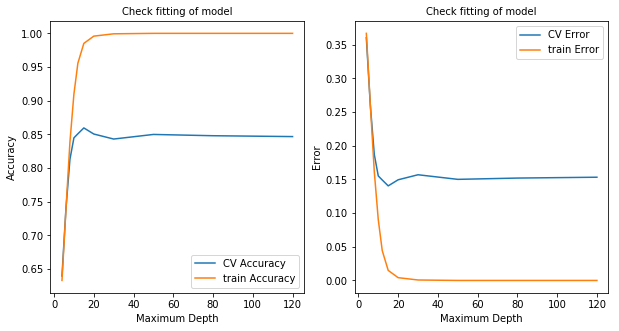

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [ ]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

('Final Accuracy DT: ', 0.8492380952380952)


### Random Forest Classifier


In [ ]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [ ]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|██████████| 12/12 [14:58<00:00, 129.22s/it]


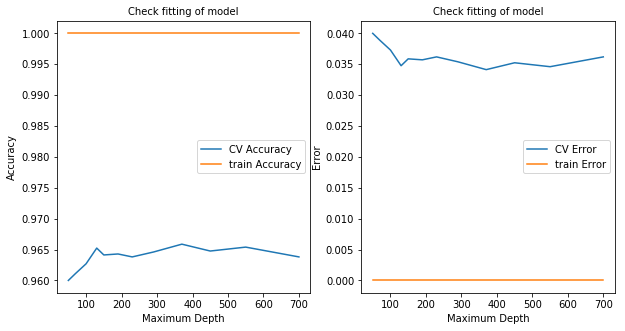

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [ ]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.9658730158730159

In [ ]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))

('Final Accuracy RF: ', 0.964)


### XGBOOST

In [ ]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] # Shrinkage parameter as hyperparameter
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)     

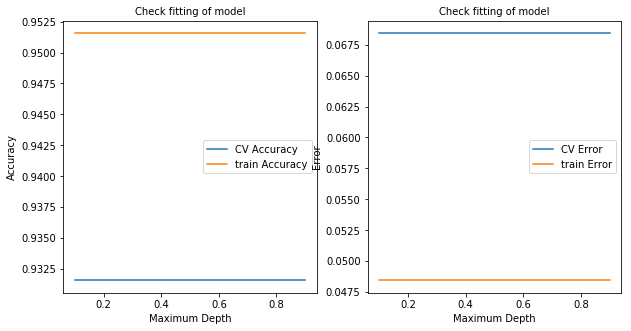

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,etaVals)

In [ ]:
def plotTestandTrainAccuracyAndError(TestAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestAcc,label='Test Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    TestError    = [1-x for x in TestAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestError,label='Test Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

100%|██████████| 6/6 [1:12:02<00:00, 717.96s/it]


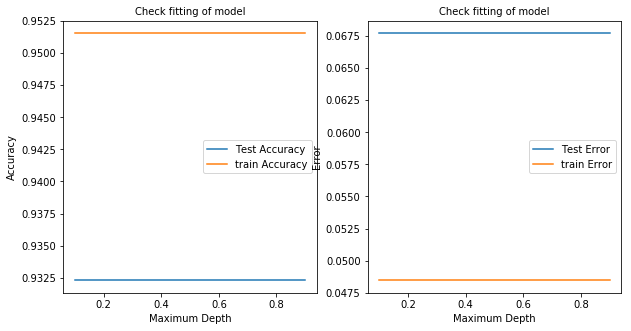

In [ ]:
TestAcc = []
for e in tqdm(etaVals):
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGTest = model.predict(X_test)
    accTest = accuracy_score(y_test, y_predXGTest)
    TestAcc.append(accTest)

plotTestandTrainAccuracyAndError(TestAcc,trainAcc,etaVals)

###  Accuracies
    1. KNN                   0.9406  
    2. Logistic Regression   0.9125
    3. SVM                   0.9581
    4. Decision Tree         0.8492
    5. Random Forest         0.964
    6. XGBOOST               0.9325